# Importing libraries and data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [37]:
df = pd.read_excel("data/lichess_games_summary.xlsx")

In [38]:
df.head(5)

,GameId,Site,Date,UTCDate,UTCTime,White,Black,WhiteElo,BlackElo,Result,...,TimeControl,ECO,Opening,Termination,NumMoves,NumTurns,WhiteCastled,BlackCastled,LastMove,MovesSAN
0,rvuBZ8lZ,https://lichess.org/rvuBZ8lZ,2024.06.29,2024.06.29,17:32:22,UdiQ,nishiv_chess,1899.0,1928.0,0-1,...,120+1,A06,Zukertort Opening: Tennison Gambit,Normal,92,46,True,False,Rxe4+,Nf3 d5 e4 dxe4 Ng5 Nc6 Nxe4 Bf5 Nbc3 e6 Qf3 Nf...
1,UHfYzLle,https://lichess.org/UHfYzLle,2024.06.29,2024.06.29,17:29:58,nishiv_chess,Rocknbol,1935.0,1848.0,0-1,...,120+1,B06,Modern Defense,Normal,54,27,False,True,Nc6,e4 g6 d4 Bg7 Be3 d6 Bd3 Nf6 Qd2 O-O Bh6 Ng4 Bx...
2,UOXnYWKB,https://lichess.org/UOXnYWKB,2024.06.29,2024.06.29,17:23:28,nishiv_chess,tmorsy123,1941.0,1907.0,0-1,...,120+1,B01,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit,106,53,True,True,Nd4,e4 d5 exd5 Qxd5 Nf3 Qe6+ Be2 Nc6 O-O h5 d4 Qg6...
3,yQkk4s62,https://lichess.org/yQkk4s62,2024.06.29,2024.06.29,17:19:10,boensaka,nishiv_chess,1894.0,1947.0,1-0,...,120+1,B20,Sicilian Defense,Normal,67,33,True,True,Rb8#,e4 c5 d3 Nc6 Nf3 e6 Be2 Nge7 c3 Ng6 Bg5 Be7 Be...
4,FlXSw9bJ,https://lichess.org/FlXSw9bJ,2024.06.29,2024.06.29,17:15:41,nishiv_chess,c4Polo,1954.0,1812.0,0-1,...,120+1,B01,Scandinavian Defense: Mieses-Kotroc Variation,Normal,63,31,True,True,Rb5,e4 d5 exd5 Qxd5 Nf3 Bg4 Be2 Nd7 O-O g6 d3 Bg7 ...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameId        10999 non-null  object 
 1   Site          10999 non-null  object 
 2   Date          10999 non-null  object 
 3   UTCDate       10999 non-null  object 
 4   UTCTime       10999 non-null  object 
 5   White         10999 non-null  object 
 6   Black         10999 non-null  object 
 7   WhiteElo      10975 non-null  float64
 8   BlackElo      10975 non-null  float64
 9   Result        10999 non-null  object 
 10  Variant       10999 non-null  object 
 11  TimeControl   10999 non-null  object 
 12  ECO           10874 non-null  object 
 13  Opening       10874 non-null  object 
 14  Termination   10999 non-null  object 
 15  NumMoves      10999 non-null  int64  
 16  NumTurns      10999 non-null  int64  
 17  WhiteCastled  10999 non-null  bool   
 18  BlackCastled  10999 non-nu

In [40]:
df.describe()

,WhiteElo,BlackElo,NumMoves,NumTurns
count,10975.000000,10975.000000,10999.000000,10999.000000
mean,1645.478633,1678.190979,63.562960,31.547686
std,208.874090,195.639894,29.913122,14.972080
min,690.000000,666.000000,0.000000,0.000000
25%,1498.000000,1553.000000,43.000000,21.000000
50%,1690.000000,1715.000000,59.000000,29.000000
75%,1794.000000,1818.000000,80.000000,40.000000
max,2766.000000,2680.000000,282.000000,141.000000


In [41]:
df.isnull().sum()

GameId            0
Site              0
Date              0
UTCDate           0
UTCTime           0
White             0
Black             0
WhiteElo         24
BlackElo         24
Result            0
Variant           0
TimeControl       0
ECO             125
Opening         125
Termination       0
NumMoves          0
NumTurns          0
WhiteCastled      0
BlackCastled      0
LastMove          1
MovesSAN          1
dtype: int64

In [42]:
df.nunique()

GameId          10999
Site            10999
Date              614
UTCDate           614
UTCTime          9997
White            4377
Black            3492
WhiteElo         1023
BlackElo          993
Result              3
Variant             9
TimeControl       164
ECO               188
Opening           578
Termination         3
NumMoves          199
NumTurns          105
WhiteCastled        2
BlackCastled        2
LastMove         1868
MovesSAN        10981
dtype: int64

In [43]:
df['Variant'].value_counts()

Variant
Standard            10809
Antichess              92
Crazyhouse             57
Chess960               22
Atomic                  7
Three-check             5
King of the Hill        4
Racing Kings            2
Horde                   1
Name: count, dtype: int64

<Axes: >

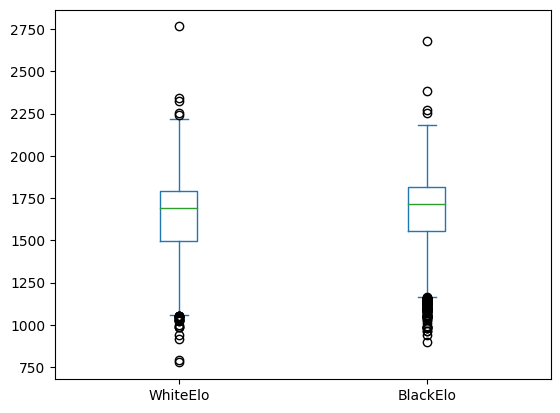

In [44]:
df[df['Variant'] == 'Standard'][['WhiteElo','BlackElo']].plot.box()

# Feature Engineering

### Player Perspective Features

In [45]:
df['PlayerColor'] = df['White'].apply(lambda x :"White" if x == "nishiv_chess" else "Black")

In [46]:
df['PlayerElo'] = df.apply(lambda row : row['WhiteElo'] if row['White'] == 'nishiv_chess' else row['BlackElo'],axis=1)
df['OpponentElo'] = df.apply(lambda row : row['WhiteElo'] if row['White'] != 'nishiv_chess' else row['BlackElo'],axis=1)

In [47]:
df['RatingDiff'] = df['PlayerElo'] - df['OpponentElo']

In [48]:
df['MatchResult'] = df.apply(lambda row : "Draw" if row['Result'] == '1/2-1/2' 
                             else "Win" if (row['Result'] == '1-0' and row['PlayerColor'] == 'White') or (row['Result'] == '0-1' and row['PlayerColor'] == 'Black')
                             else "Loss",axis = 1)

### Time Related Features

In [49]:
# Convert to datetime with UTC timezone
df['UTCDateTime'] = pd.to_datetime(
    df['UTCDate'] + ' ' + df['UTCTime'],
    format="%Y.%m.%d %H:%M:%S",
    errors='coerce'
).dt.tz_localize('UTC')

df['LocalDateTime'] = df['UTCDateTime'].dt.tz_convert('Asia/Kolkata')

In [50]:
df['LocalDateTime'].dtype

datetime64[ns, Asia/Kolkata]

In [51]:
df['GameDay'] = df['LocalDateTime'].dt.day
df['DayOfWeek'] = df['LocalDateTime'].dt.day_name()
df['GameHour'] =df['LocalDateTime'].dt.hour

In [52]:
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x : x == 'Saturday' or x == 'Sunday')

### Game Type & Progression

In [53]:
def game_type(timecontrol):

    if timecontrol == '-': # Games played with Platform chess engines
        return "Correspondence"
    
    base,inc = map(int,timecontrol.split('+'))
    estimated_time = base + inc*40  # Average moves = 40 as considered by Lichess and other platforms
    if estimated_time < 180:
        return "Bullet"
    elif estimated_time >= 180 and estimated_time < 600:
        return "Blitz"
    elif estimated_time >= 600 and estimated_time < 1800:
        return "Rapid"
    else:
        return "Classical"

In [54]:
df['GameType'] = df['TimeControl'].apply(game_type)

In [55]:
df[['MainOpening','OpeningVariation']] = df['Opening'].str.split(': ', n=1, expand=True)

### Game Quality

In [56]:
def termination_type(row):
    if row['Termination'] == "Normal":
        if row['LastMove'] is None or str(row['LastMove'])[-1] != '#':
            return "Resigned"
        else:
            return "Checkmate"
    return row['Termination']

In [57]:
df['TerminationType'] = df.apply(termination_type,axis = 1)

In [58]:
df['GameLength'] = df['NumTurns'].apply(lambda x : "Short" if x < 10 else "Medium" if x >= 10 and x < 60 else "Long")

# Exploratory Data Analysis

### Overview Statistics

In [59]:
df.head()

,GameId,Site,Date,UTCDate,UTCTime,White,Black,WhiteElo,BlackElo,Result,...,LocalDateTime,GameDay,DayOfWeek,GameHour,IsWeekend,GameType,MainOpening,OpeningVariation,TerminationType,GameLength
0,rvuBZ8lZ,https://lichess.org/rvuBZ8lZ,2024.06.29,2024.06.29,17:32:22,UdiQ,nishiv_chess,1899.0,1928.0,0-1,...,2024-06-29 23:02:22+05:30,29,Saturday,23,True,Bullet,Zukertort Opening,Tennison Gambit,Resigned,Medium
1,UHfYzLle,https://lichess.org/UHfYzLle,2024.06.29,2024.06.29,17:29:58,nishiv_chess,Rocknbol,1935.0,1848.0,0-1,...,2024-06-29 22:59:58+05:30,29,Saturday,22,True,Bullet,Modern Defense,None,Resigned,Medium
2,UOXnYWKB,https://lichess.org/UOXnYWKB,2024.06.29,2024.06.29,17:23:28,nishiv_chess,tmorsy123,1941.0,1907.0,0-1,...,2024-06-29 22:53:28+05:30,29,Saturday,22,True,Bullet,Scandinavian Defense,Mieses-Kotroc Variation,Time forfeit,Medium
3,yQkk4s62,https://lichess.org/yQkk4s62,2024.06.29,2024.06.29,17:19:10,boensaka,nishiv_chess,1894.0,1947.0,1-0,...,2024-06-29 22:49:10+05:30,29,Saturday,22,True,Bullet,Sicilian Defense,None,Checkmate,Medium
4,FlXSw9bJ,https://lichess.org/FlXSw9bJ,2024.06.29,2024.06.29,17:15:41,nishiv_chess,c4Polo,1954.0,1812.0,0-1,...,2024-06-29 22:45:41+05:30,29,Saturday,22,True,Bullet,Scandinavian Defense,Mieses-Kotroc Variation,Resigned,Medium


In [60]:
df.columns

Index(['GameId', 'Site', 'Date', 'UTCDate', 'UTCTime', 'White', 'Black',
       'WhiteElo', 'BlackElo', 'Result', 'Variant', 'TimeControl', 'ECO',
       'Opening', 'Termination', 'NumMoves', 'NumTurns', 'WhiteCastled',
       'BlackCastled', 'LastMove', 'MovesSAN', 'PlayerColor', 'PlayerElo',
       'OpponentElo', 'RatingDiff', 'MatchResult', 'UTCDateTime',
       'LocalDateTime', 'GameDay', 'DayOfWeek', 'GameHour', 'IsWeekend',
       'GameType', 'MainOpening', 'OpeningVariation', 'TerminationType',
       'GameLength'],
      dtype='object')

In [61]:
# Total games
total_games = df.shape[0]

# Results 
wins = (df['MatchResult'] == 'Win').sum()
losses = (df['MatchResult'] == 'Loss').sum()
draws = (df['MatchResult'] == 'Draw').sum()

# Color Distribution
games_white = (df['PlayerColor'] == 'White').sum()
games_black = total_games - games_white

# Game Types
game_types = df['GameType'].value_counts()
game_variants = df['Variant'].value_counts()
termination_types = df['TerminationType'].value_counts()

In [62]:
# Print Summary

print(f'Total games played : {total_games}')
print(f'Wins : {wins}')
print(f'Losses : {losses}')
print(f'Draws : {draws} \n')

print(f'Games as white : {games_white}')
print(f'Games as black : {games_black} \n')

print(f'Game by types:')
print(game_types.to_string(),'\n')

print(f'Games by Variant:')
print(game_variants.to_string(),'\n')

print(f'Games Termination Types:')
print(termination_types.to_string(),'\n')

Total games played : 10999
Wins : 7820
Losses : 2883
Draws : 296 

Games as white : 4757
Games as black : 6242 

Game by types:
GameType
Blitz             5951
Bullet            4306
Rapid              701
Correspondence      41 

Games by Variant:
Variant
Standard            10809
Antichess              92
Crazyhouse             57
Chess960               22
Atomic                  7
Three-check             5
King of the Hill        4
Racing Kings            2
Horde                   1 

Games Termination Types:
TerminationType
Resigned        6371
Time forfeit    2436
Checkmate       2190
Abandoned          2 



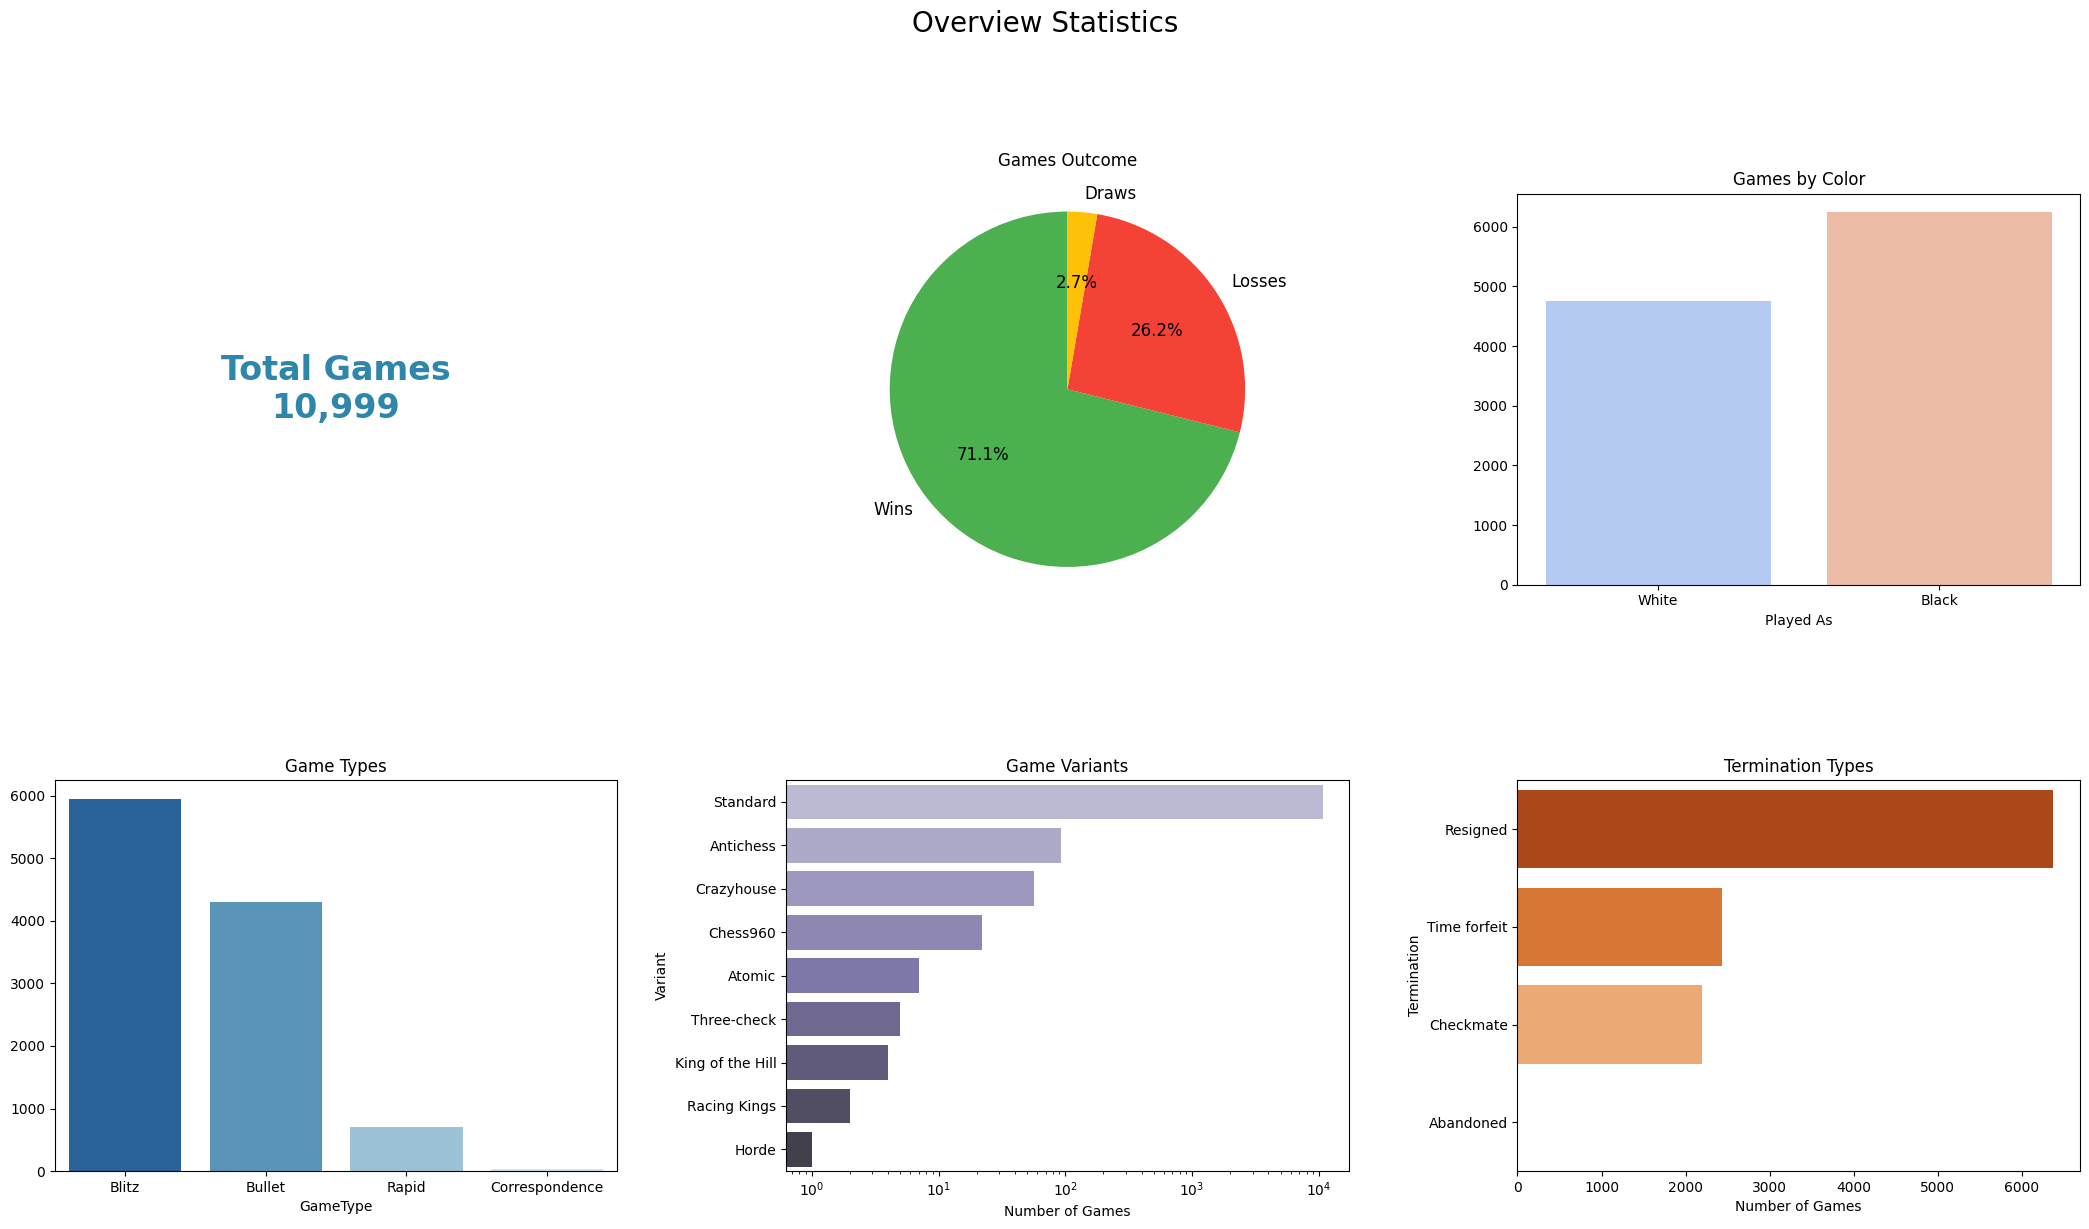

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(21, 12))
fig.suptitle("Overview Statistics", fontsize=20, y=1.02)

# 1. KPI Card – Total Games
axes[0][0].text(0.5, 0.5, f'Total Games\n{total_games:,}',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=24, fontweight='bold',
                color='#2E86AB')
axes[0][0].axis('off')

# 2. Games Outcome
axes[0][1].pie([wins, losses, draws],
               labels=['Wins', 'Losses', 'Draws'],
               autopct='%1.1f%%',
               colors=['#4CAF50', '#F44336', '#FFC107'],
               startangle=90,
               textprops={'fontsize': 12})
axes[0][1].set_title("Games Outcome", pad=20)
axes[0][1].axis('equal')

# 3. Games by Color
sns.barplot(x=['White', 'Black'],
            y=[games_white, games_black],
            palette='coolwarm',
            ax=axes[0][2])
axes[0][2].set_title('Games by Color')
axes[0][2].set_xlabel('Played As')

# 4. Game Types
sns.barplot(x=game_types.index,
            y=game_types.values,
            palette='Blues_r',
            ax=axes[1][0])
axes[1][0].set_title('Game Types')
axes[1][0].tick_params(axis='x')

# 5. Game Variants (Log Scale)
sns.barplot(x=game_variants.values,
            y=game_variants.index,
            palette='Purples_d',
            ax=axes[1][1])
axes[1][1].set_xscale('log')
axes[1][1].set_title('Game Variants')
axes[1][1].set_xlabel('Number of Games')
axes[1][1].set_ylabel('Variant')

# 6. Termination Types
sns.barplot(x=termination_types.values,
            y=termination_types.index,
            palette='Oranges_r',
            ax=axes[1][2])
axes[1][2].set_title('Termination Types')
axes[1][2].set_xlabel('Number of Games')
axes[1][2].set_ylabel('Termination')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()
